### RNN - LSTM

### Build a model to predict the tomorrow's **Open** value based on the today's **Open** value.

#### Import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import math
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

#### Process

In [5]:
# covert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
	#t
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
	#t+1
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [6]:
np.random.seed(13)

In [7]:
df = pd.read_csv('AAPL.csv',index_col = 0)
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-14,26.927500,26.952499,26.020000,26.427500,24.825821,204702000
2016-11-15,26.642500,26.920000,26.540001,26.777500,25.154610,129058000
2016-11-16,26.674999,27.557501,26.650000,27.497499,25.830971,235362000
2016-11-17,27.452499,27.587500,27.207500,27.487499,25.821573,110528000
2016-11-18,27.430000,27.635000,27.415001,27.514999,25.847408,113715600
2016-11-21,27.530001,27.997499,27.502501,27.932501,26.239609,117058400
2016-11-22,27.987499,28.105000,27.850000,27.950001,26.256044,103862000
2016-11-23,27.840000,27.877501,27.582500,27.807501,26.122183,109705600
2016-11-25,27.782499,27.967501,27.737499,27.947500,26.253696,45903600


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1008 entries, 2016-11-14 to 2020-11-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1008 non-null   float64
 1   High       1008 non-null   float64
 2   Low        1008 non-null   float64
 3   Close      1008 non-null   float64
 4   Adj Close  1008 non-null   float64
 5   Volume     1008 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.1+ KB


In [31]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1.008000e+03
mean,55.022847,55.634645,54.439440,55.068780,53.661965,1.279139e+08
std,22.808228,23.199504,22.329356,22.778370,23.265842,5.914382e+07
min,26.642500,26.920000,26.020000,26.427500,24.825821,2.880380e+07
25%,39.973123,40.278123,39.636251,39.968751,38.069605,8.788140e+07
50%,47.244999,47.631248,46.872500,47.197500,45.769047,1.118354e+08
75%,61.968749,63.971249,61.203751,62.090624,61.046269,1.499102e+08
max,137.589996,137.979996,130.529999,134.179993,133.948898,4.479400e+08


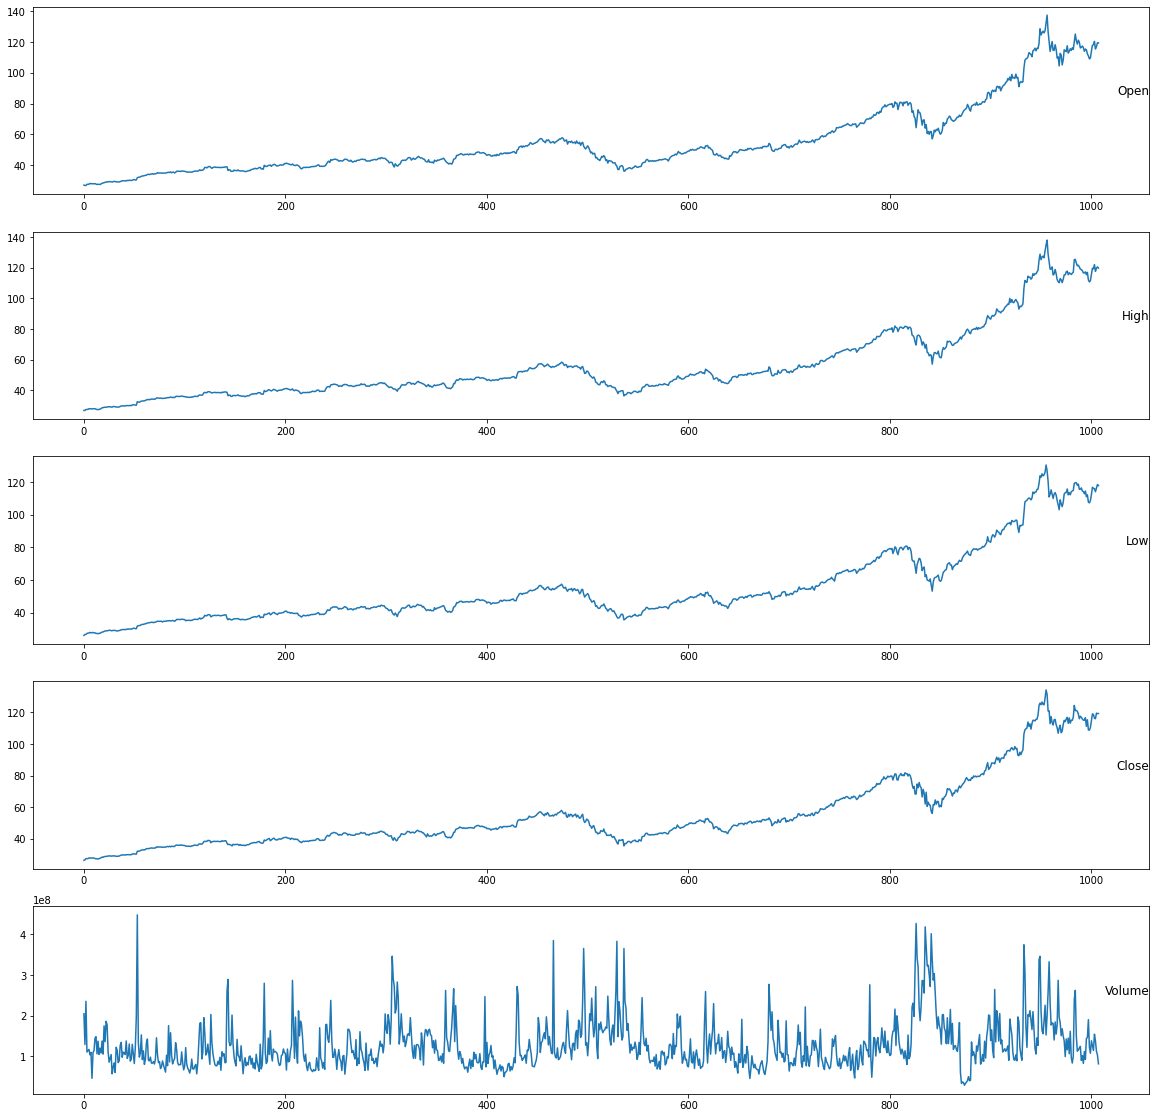

In [32]:
values = df.values
# specify columns to plot
groups = [0, 1, 2, 3, 5]
i = 1
# plot each column
plt.figure(figsize=(20,20))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [8]:
dataset=df[["Open"]] #i-1
dataset=dataset.values.astype('float32')

In [9]:
# normalize the dataset
scaler=MinMaxScaler(feature_range=(0,1))
dataset=scaler.fit_transform(dataset)

In [10]:
len(dataset)

1008

In [11]:
# Split into train and test sets
train_size= int(len(dataset)*0.67)
test_size=len(dataset) - train_size
train,test=dataset[0:train_size,:],dataset[train_size:len(dataset),:]

In [12]:
# reshape into X=t and Y=t+1
look_back=1
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)

In [13]:
type(trainX)

numpy.ndarray

In [14]:
print(trainX[:5])
print(trainY[:5])

[[0.00256878]
 [0.        ]
 [0.00029293]
 [0.00730075]
 [0.00709796]]
[0.         0.00029293 0.00730075 0.00709796 0.00799929]


In [15]:
print(testX[:5])
print(testY[:5])

[[0.22781047]
 [0.23055953]
 [0.22738233]
 [0.22959062]
 [0.23026657]]
[0.23055953 0.22738233 0.22959062 0.23026657 0.247527  ]


In [16]:
# reshape input to be [samples,time steps, features]
trainX=np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX=np.reshape(testX,(testX.shape[0],1,testX.shape[1]))
# Tổng số mẫu (timestep, feature)

In [17]:
# create and fit the LSTM network
model=Sequential()
model.add(LSTM(32,input_shape=(1,look_back))) # 64,...
model.add(Dense(1))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.0001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [20]:
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, 
                    validation_data=(testX, testY), 
                    epochs=100, #100, 200
                    batch_size=128, # 32, 64, 128
                    callbacks=[early_stopping],
                   )


Epoch 1/100
6/6 [==============================] - 7s 88ms/step - loss: 0.0215 - val_loss: 0.2413
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0169 - val_loss: 0.2199
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0130 - val_loss: 0.2000
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0098 - val_loss: 0.1817
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0073 - val_loss: 0.1650
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0054 - val_loss: 0.1500
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0042 - val_loss: 0.1373
Epoch 8/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0034 - val_loss: 0.1269
Epoch 9/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0030 - val_loss: 0.1187
Epoch 10/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0029 - val_loss: 0.1128
Epoch 11/100
6/6 [==========

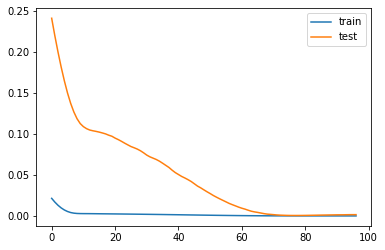

In [21]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


Nhan xet: Model bi overfitting

In [22]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


11/11 [==============================] - 0s 3ms/step


In [23]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [24]:
trainY[0][:5]

array([26.64249951, 26.67499903, 27.45249934, 27.43000031, 27.53000022])

In [25]:
trainPredict[:5]

array([[28.84387 ],
       [28.603783],
       [28.631144],
       [29.28702 ],
       [29.268003]], dtype=float32)

In [26]:
# Calculate root mean squared error
train_rmse = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train RMSE: %.2f RMSE' % (train_rmse))
test_rmse = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f RMSE' % (test_rmse))


Train RMSE: 0.92 RMSE
Test RMSE: 2.68 RMSE


In [27]:
train_mae = mean_absolute_error(trainY[0], trainPredict[:,0])
print('Train MAE: %.2f MAE' % (train_mae))
test_mae = mean_absolute_error(testY[0], testPredict[:,0])
print('test MAE: %.2f MAE' % (test_mae))


Train MAE: 0.72 MAE
test MAE: 2.03 MAE


In [28]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


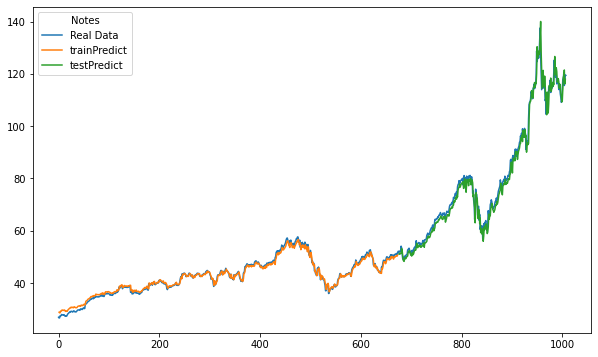

In [29]:
# plot baseline and predictions
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(dataset), label='Real Data')
plt.plot(trainPredictPlot, label='trainPredict')
plt.plot(testPredictPlot, label='testPredict')
plt.legend(title="Notes")
plt.show()


Nhan xet: Model hoat dong tuong doi tot

### Build a model to predict the tomorrow's **Open** value based on the today's **Open, High, Low, Close, Adj Close, Volume**

In [34]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-14,26.927500,26.952499,26.020000,26.427500,24.825821,204702000
2016-11-15,26.642500,26.920000,26.540001,26.777500,25.154610,129058000
2016-11-16,26.674999,27.557501,26.650000,27.497499,25.830971,235362000
2016-11-17,27.452499,27.587500,27.207500,27.487499,25.821573,110528000
2016-11-18,27.430000,27.635000,27.415001,27.514999,25.847408,113715600


In [33]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))        
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True) # kết quả sau khi drop gán luôn vào agg
	return agg

In [53]:
# # load dataset
values = df.values
# integer encode direction 
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(values)
scaled = scaler.transform(values)
print("Frame as Series:")
print(scaled[:5])
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("Frame as supervised learning:")
print(reframed.head())
# Vì chỉ predict thông tin var1(t), còn từ var2(t) trở đi không dự đoán nên drop
# giữ lại các cột từ 0-6 (6 cột đầu là inputs, cột cuối là output)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[7,8,9,10,11]], axis=1, inplace=True)
print("Frame will use:")
print(reframed.head())

Frame as Series:
[[2.5687814e-03 2.9262900e-04 0.0000000e+00 0.0000000e+00 0.0000000e+00
  4.1966838e-01]
 [0.0000000e+00 0.0000000e+00 4.9756020e-03 3.2481849e-03 3.0130148e-03
  2.3919241e-01]
 [2.9292703e-04 5.7401359e-03 6.0281307e-03 9.9301785e-03 9.2111528e-03
  4.9281877e-01]
 [7.3007494e-03 6.0102493e-03 1.1362538e-02 9.8373443e-03 9.1250390e-03
  1.9498245e-01]
 [7.0979595e-03 6.4379573e-03 1.3347998e-02 1.0092571e-02 9.3617886e-03
  2.0258759e-01]]
Frame as supervised learning:
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var1(t)  \
1   0.002569   0.000293   0.000000   0.000000   0.000000   0.419668  0.000000   
2   0.000000   0.000000   0.004976   0.003248   0.003013   0.239192  0.000293   
3   0.000293   0.005740   0.006028   0.009930   0.009211   0.492819  0.007301   
4   0.007301   0.006010   0.011363   0.009837   0.009125   0.194982  0.007098   
5   0.007098   0.006438   0.013348   0.010093   0.009362   0.202588  0.007999   

    var2(t)   var3(t

In [54]:
# split into train and test sets
values = reframed.values
train_size= int(len(dataset)*0.67)
train = values[:train_size, :]
# còn lại thì là test
test = values[train_size:, :]
# split into input and outputs (các cột đầu, cột cuối)
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print("Before reshape:")
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print("After reshape:")
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


Before reshape:
(675, 6) (675,) (332, 6) (332,)
After reshape:
(675, 1, 6) (675,) (332, 1, 6) (332,)


In [55]:
# design network
model = Sequential()
model.add(LSTM(32, input_shape=(train_X.shape[1], train_X.shape[2]))) # 1 sample has 8 features
model.add(Dense(1))

In [56]:
model.compile(loss='mae', optimizer='adam')

In [57]:
# fit network
history = model.fit(train_X, train_y, 
                    epochs=100, 
                    batch_size=72, 
                    validation_data=(test_X, test_y), 
                    verbose=2
                    )

Epoch 1/100
10/10 - 2s - loss: 0.1217 - val_loss: 0.3716 - 2s/epoch - 206ms/step
Epoch 2/100
10/10 - 0s - loss: 0.0749 - val_loss: 0.2747 - 54ms/epoch - 5ms/step
Epoch 3/100
10/10 - 0s - loss: 0.0384 - val_loss: 0.1817 - 54ms/epoch - 5ms/step
Epoch 4/100
10/10 - 0s - loss: 0.0293 - val_loss: 0.1401 - 62ms/epoch - 6ms/step
Epoch 5/100
10/10 - 0s - loss: 0.0284 - val_loss: 0.1444 - 55ms/epoch - 5ms/step
Epoch 6/100
10/10 - 0s - loss: 0.0237 - val_loss: 0.1385 - 55ms/epoch - 6ms/step
Epoch 7/100
10/10 - 0s - loss: 0.0209 - val_loss: 0.1079 - 66ms/epoch - 7ms/step
Epoch 8/100
10/10 - 0s - loss: 0.0179 - val_loss: 0.0849 - 52ms/epoch - 5ms/step
Epoch 9/100
10/10 - 0s - loss: 0.0146 - val_loss: 0.0558 - 64ms/epoch - 6ms/step
Epoch 10/100
10/10 - 0s - loss: 0.0112 - val_loss: 0.0255 - 55ms/epoch - 5ms/step
Epoch 11/100
10/10 - 0s - loss: 0.0079 - val_loss: 0.0141 - 53ms/epoch - 5ms/step
Epoch 12/100
10/10 - 0s - loss: 0.0054 - val_loss: 0.0306 - 70ms/epoch - 7ms/step
Epoch 13/100
10/10 - 0s -

In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 32)                4992      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,025
Trainable params: 5,025
Non-trainable params: 0
_________________________________________________________________


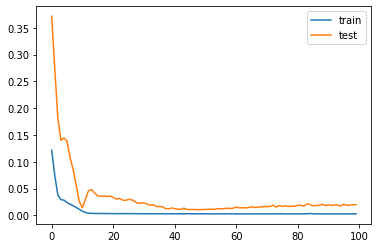

In [59]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

Nhan xet: Model hop ly, co the su dung duoc

In [60]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(675, 1, 6) (675,) (332, 1, 6) (332,)


In [61]:
def invert_scaling(y, X, s):
    # invert scaling for forecast
    inv_y = np.concatenate((y, X[:, 1:]), axis=1)
    print(s, "shape:", inv_y.shape)
    inv_y = scaler.inverse_transform(inv_y)
    print(s, inv_y.shape)
    # trả lại hình dạng ban đầu
    inv_y = inv_y[:,0]
    return inv_y

In [62]:
# make a prediction
yhat = model.predict(test_X)
print("Test_x_shape:", test_X.shape)
test_X_now = test_X.reshape((test_X.shape[0], test_X.shape[2]))
print("Test_x_now_shape:", test_X_now.shape)

11/11 [==============================] - 0s 2ms/step
Test_x_shape: (332, 1, 6)
Test_x_now_shape: (332, 6)


In [63]:
# invert scaling for forecast
inv_yhat = invert_scaling(yhat, test_X_now, "inv_yhat")

inv_yhat shape: (332, 6)
inv_yhat (332, 6)


In [64]:
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = invert_scaling(test_y, test_X_now, "inv_y")

inv_y shape: (332, 6)
inv_y (332, 6)


In [65]:
# calculate RMSE
rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
mae = mean_absolute_error(inv_y, inv_yhat)
print('Test MAE: %.3f' % mae)

Test RMSE: 3.415
Test MAE: 2.203


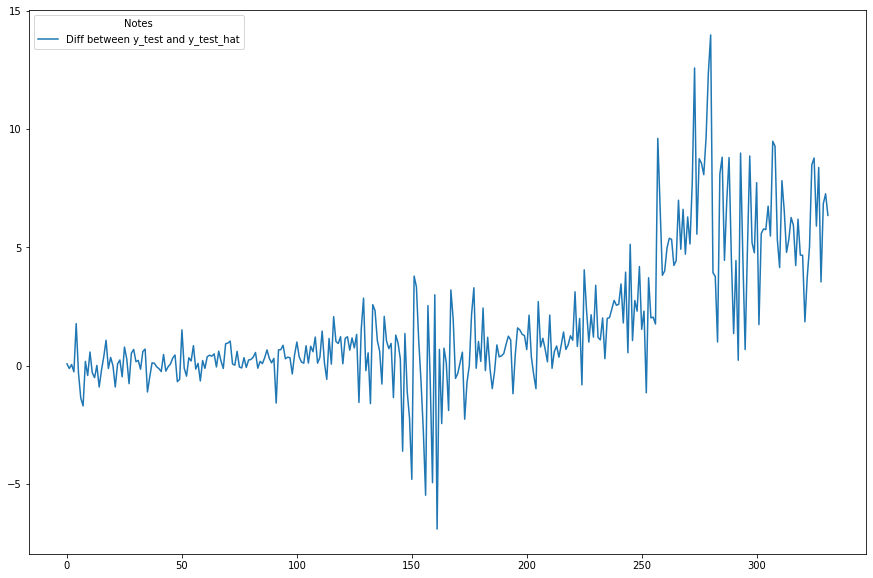

In [66]:
plt.figure(figsize=(15,10))
plt.plot(inv_y - inv_yhat, label='Diff between y_test and y_test_hat')
plt.legend(title="Notes")
plt.show()

In [67]:
# make a prediction of y
y_train_hat = model.predict(train_X)
train_X_now = train_X.reshape((train_X.shape[0], train_X.shape[2]))

# invert scaling for forecast
inv_y_train_hat = invert_scaling(y_train_hat, train_X_now, "inv_y_train_hat")

22/22 [==============================] - 0s 2ms/step
inv_y_train_hat shape: (675, 6)
inv_y_train_hat (675, 6)


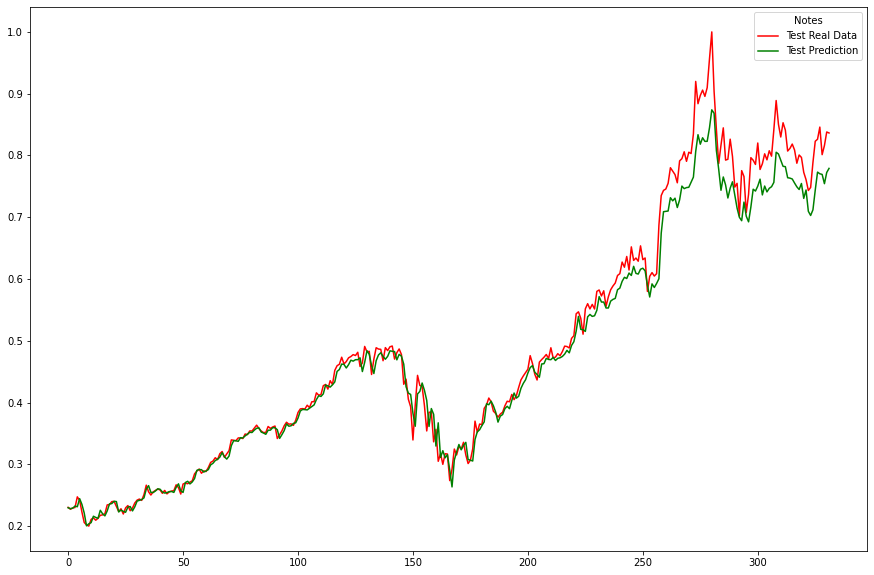

In [68]:
# plot baseline and predictions
plt.figure(figsize=(15,10))
plt.plot(test_y, label='Test Real Data', color='red')
plt.plot(yhat, label='Test Prediction', color='green')
plt.legend(title="Notes")
plt.show()

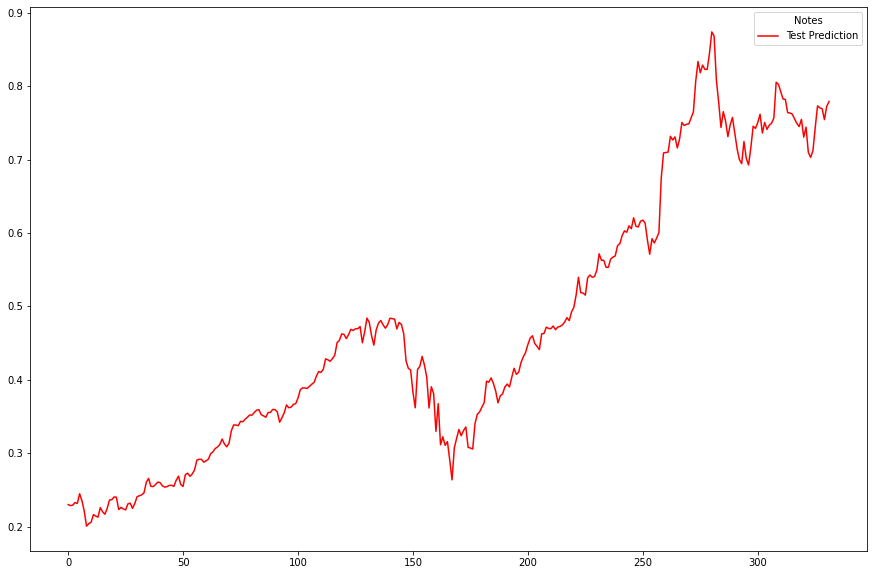

In [69]:
# plot baseline and predictions
plt.figure(figsize=(15,10))
plt.plot(yhat, label='Test Prediction', color='red')
plt.legend(title="Notes")
plt.show()

In [70]:
print('Val_loss train')
model.evaluate(train_X, train_y)

Val_loss train
22/22 [==============================] - 0s 2ms/step - loss: 0.0027


0.0027074404060840607

In [71]:
print('Val_loss test')
model.evaluate(test_X, test_y)

Val_loss test
11/11 [==============================] - 1s 8ms/step - loss: 0.0199


0.019860120490193367

Nhan xet: Model tuong doi tot, cac chi so val loss deu nho